In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# One-class SVM as a novelty detector

Recall that a novelty detector learns the distribution characteristics of a **clean** training data without outliers: indeed, it treats the training data as the very definition of inliner data instances.

Thereafter, in can be used to determine if a new data instance $\mathbf{X_i}$ is an outlier, or not, by checking against its internal notion of inliners.

One such novelty detector is the `OneClassSVM`. Let us see this in action. We will try this on the `smiley` dataset, but will first filter out the outliers and split it into a training and test set.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/smiley.csv'
data = pd.read_csv(source)


Recall that this data has some outliers (*pimples on the face*):

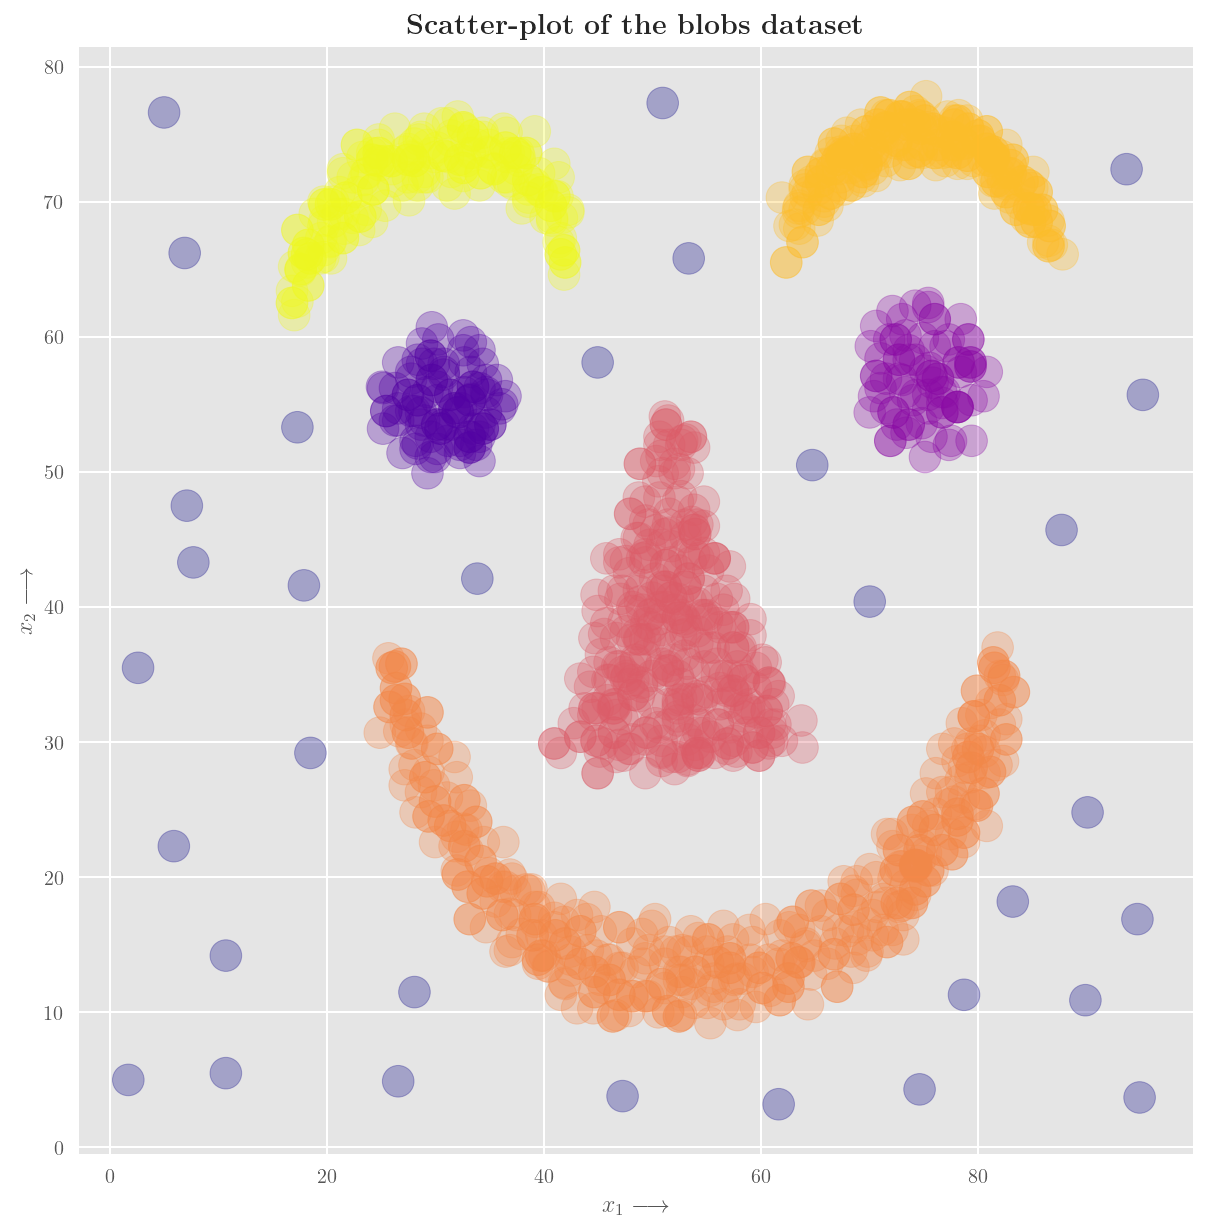

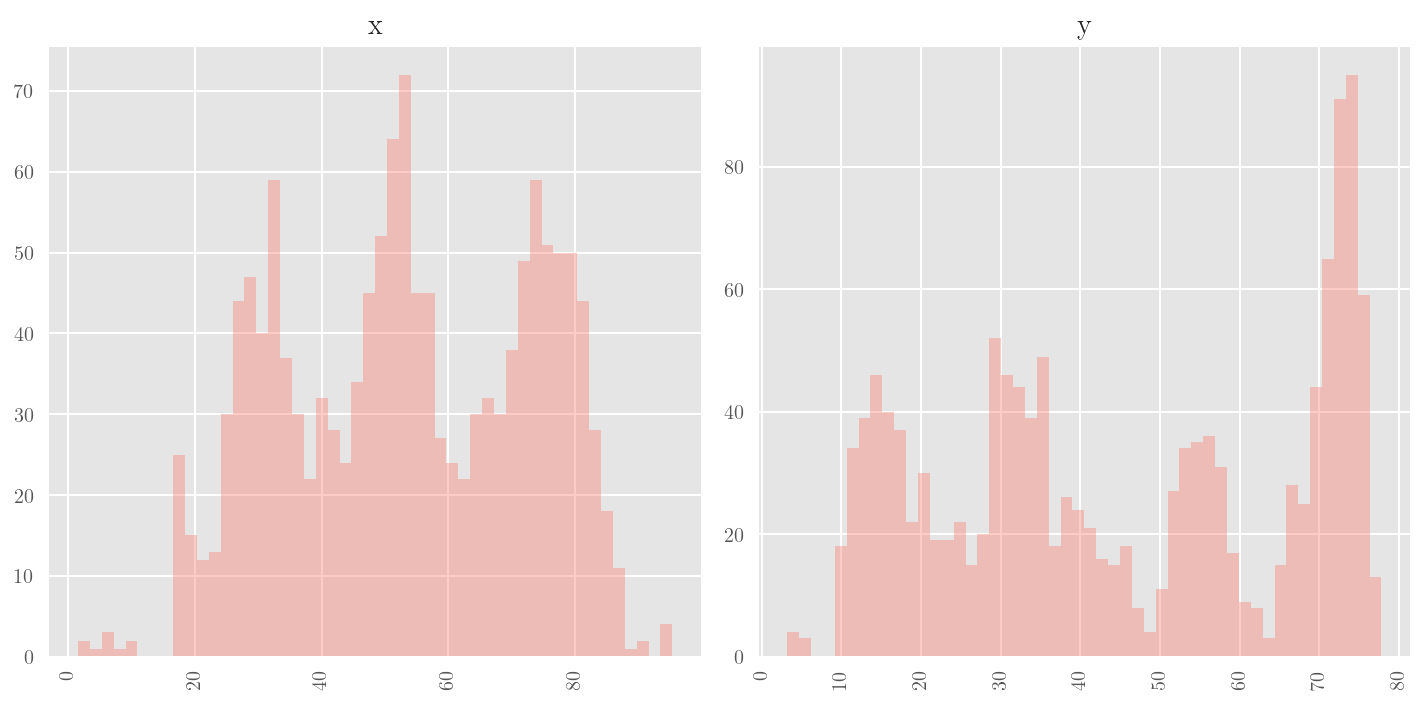

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(data['x'], data['y'], alpha=0.3, s=250, cmap='plasma', c=data['t'])
plt.title(r'\textbf{Scatter-plot of the blobs dataset}')
plt.xlabel(r'$x_1\longrightarrow$')
plt.ylabel(r'$x_2\longrightarrow$')
plt.show()
data.drop(columns=['t']).hist(bins=50, alpha=0.4, color='salmon', xrot=90, figsize=(10, 5))
plt.tight_layout()

Let us now differentiate the inliners from the outliers.

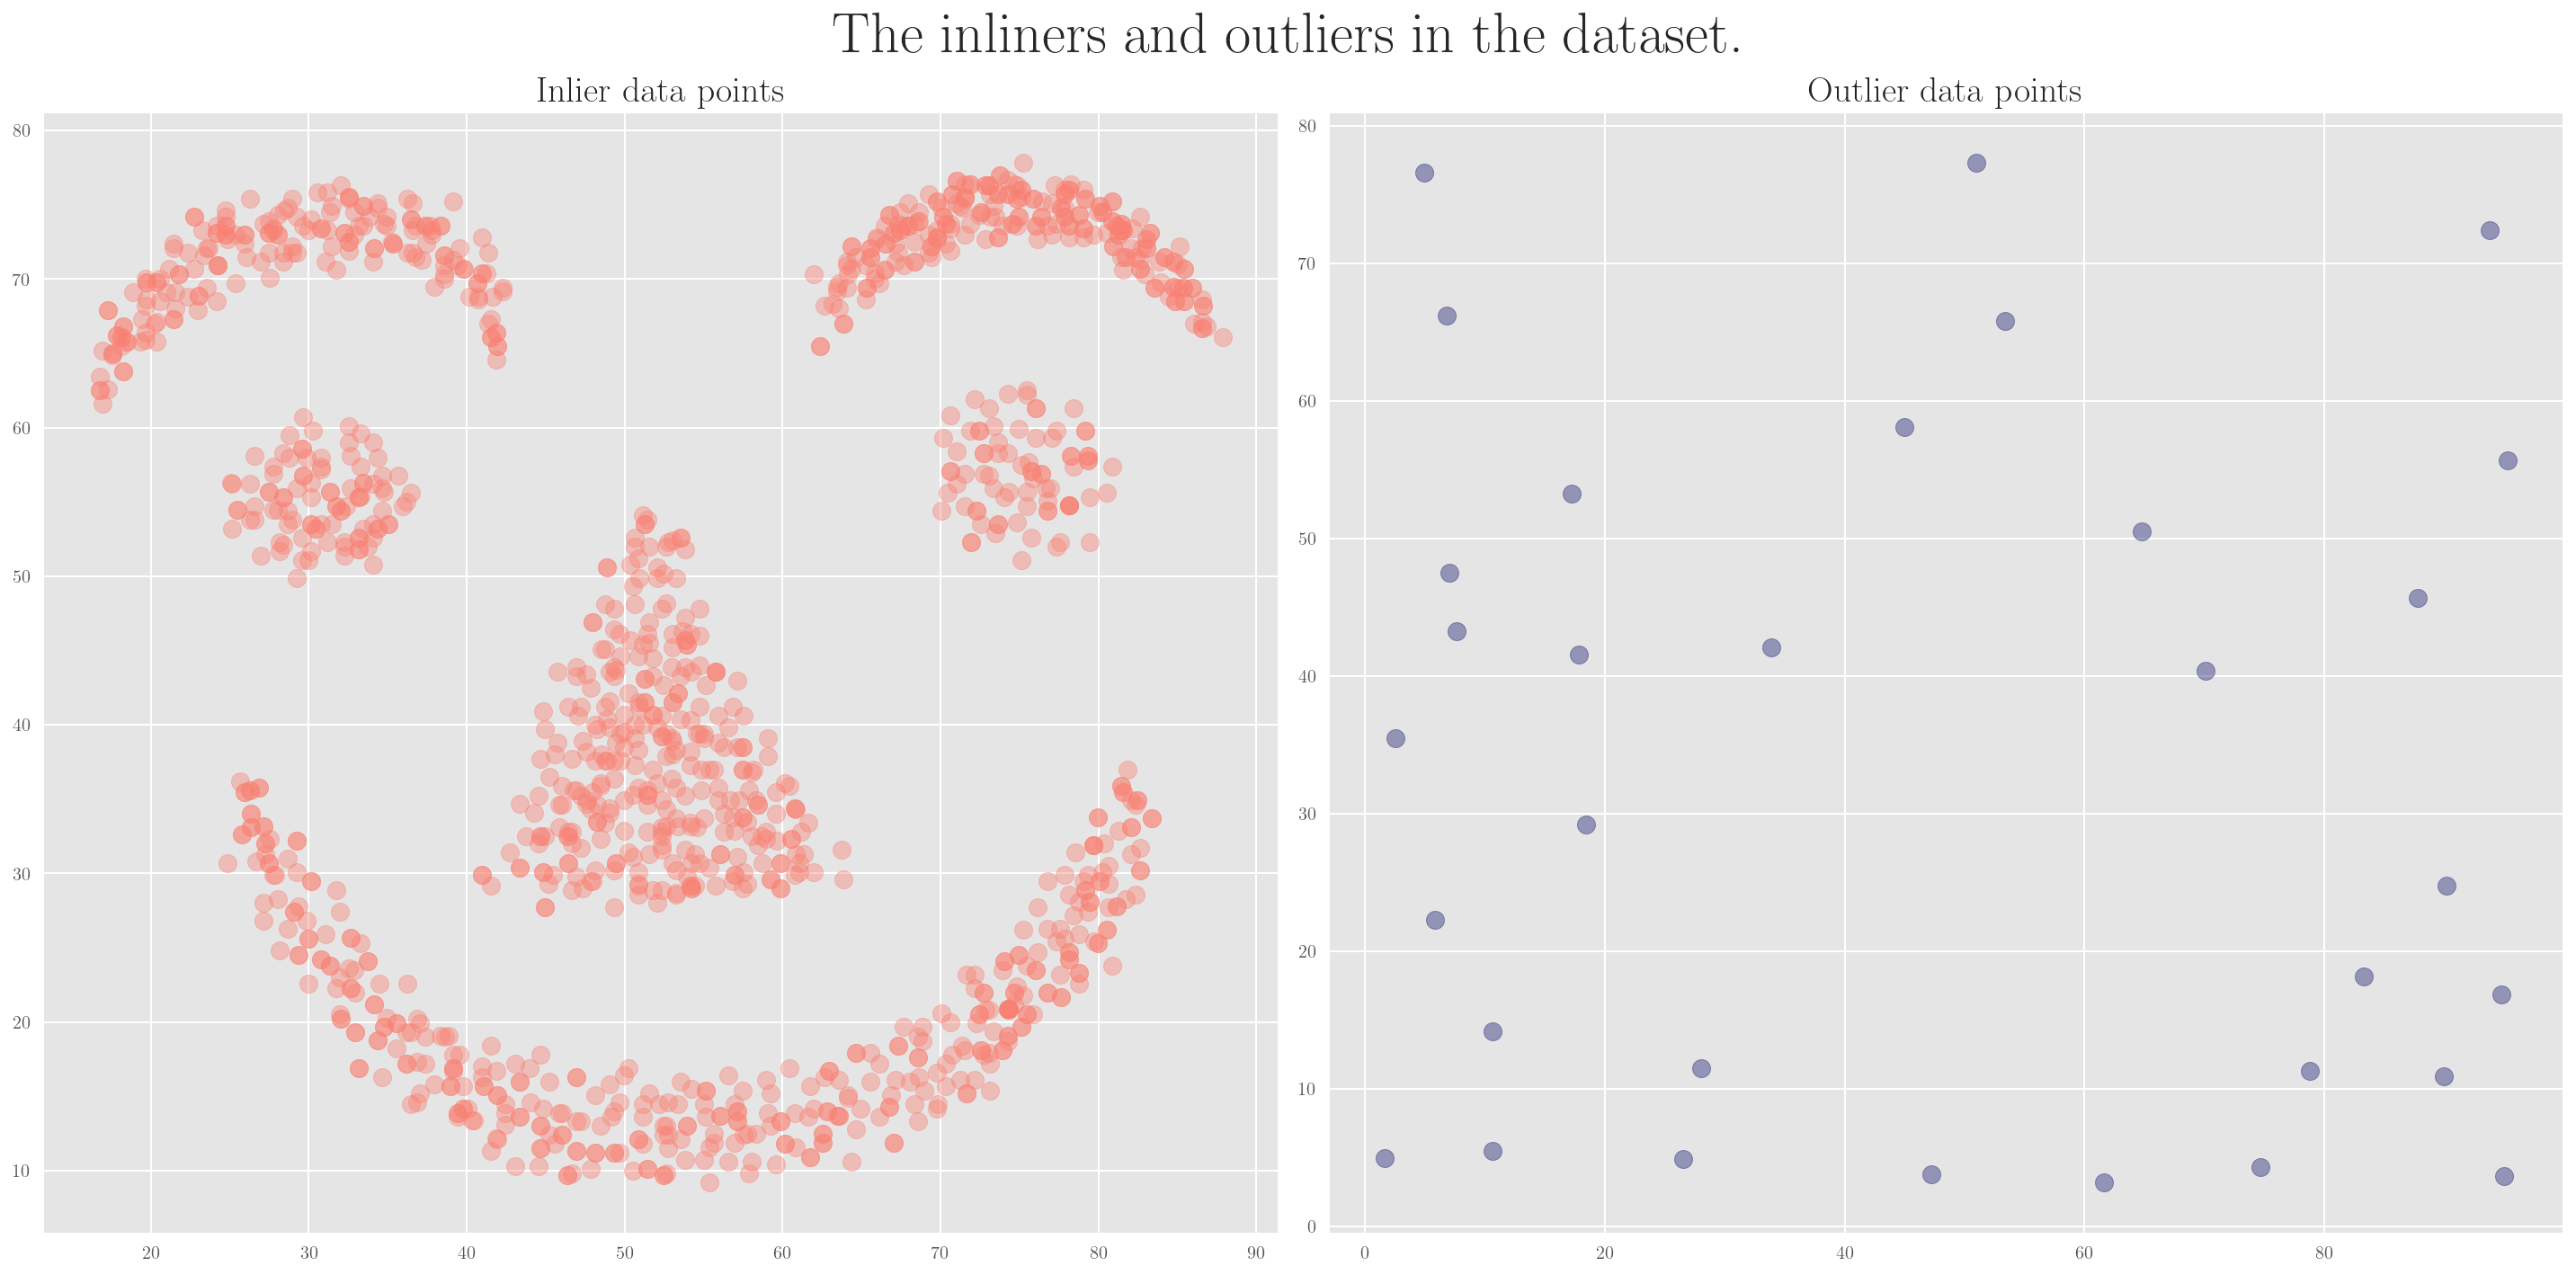

In [4]:
inliers = data[data['t'] > 0]
outliers = data[data['t'] == 0]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(inliers.x, inliers.y, color='salmon', alpha=0.4, s=100)
ax1.set_title('Inlier data points', size=20)
ax2.scatter(outliers.x, outliers.y, color='midnightblue', alpha=0.4, s=100)
ax2.set_title('Outlier data points', size=20)
plt.suptitle("The inliners and outliers in the dataset.", size=32)
plt.tight_layout()

Let us split the inlier dataset between `inlier_train` and `inlier_test`.

In [5]:
from sklearn.utils import shuffle
df = shuffle(inliers)
df.shape

(1362, 3)

In [6]:
inlier_train = df[:1200]
inlier_test = df[1200:]

In [7]:
test_data = pd.concat([inlier_test,outliers])

In [8]:
from sklearn import svm
detector = svm.OneClassSVM(nu=0.01, kernel='rbf', gamma=0.01)
detector.fit(inlier_train)

ŷ = detector.predict(test_data)

test_data['pred'] = ŷ

test_data

,x,y,t,pred
1136,65.85,70.0,6,1
663,76.75,29.5,5,1
1245,78.15,73.6,6,1
317,25.75,32.6,5,1
648,78.75,22.6,5,1
...,...,...,...,...
1389,47.25,3.8,0,-1
1390,61.65,3.2,0,-1
1391,26.55,4.9,0,-1
1392,1.65,5.0,0,-1


Text(0.5, 1.0, 'Novelty detection using the One-class SVM')

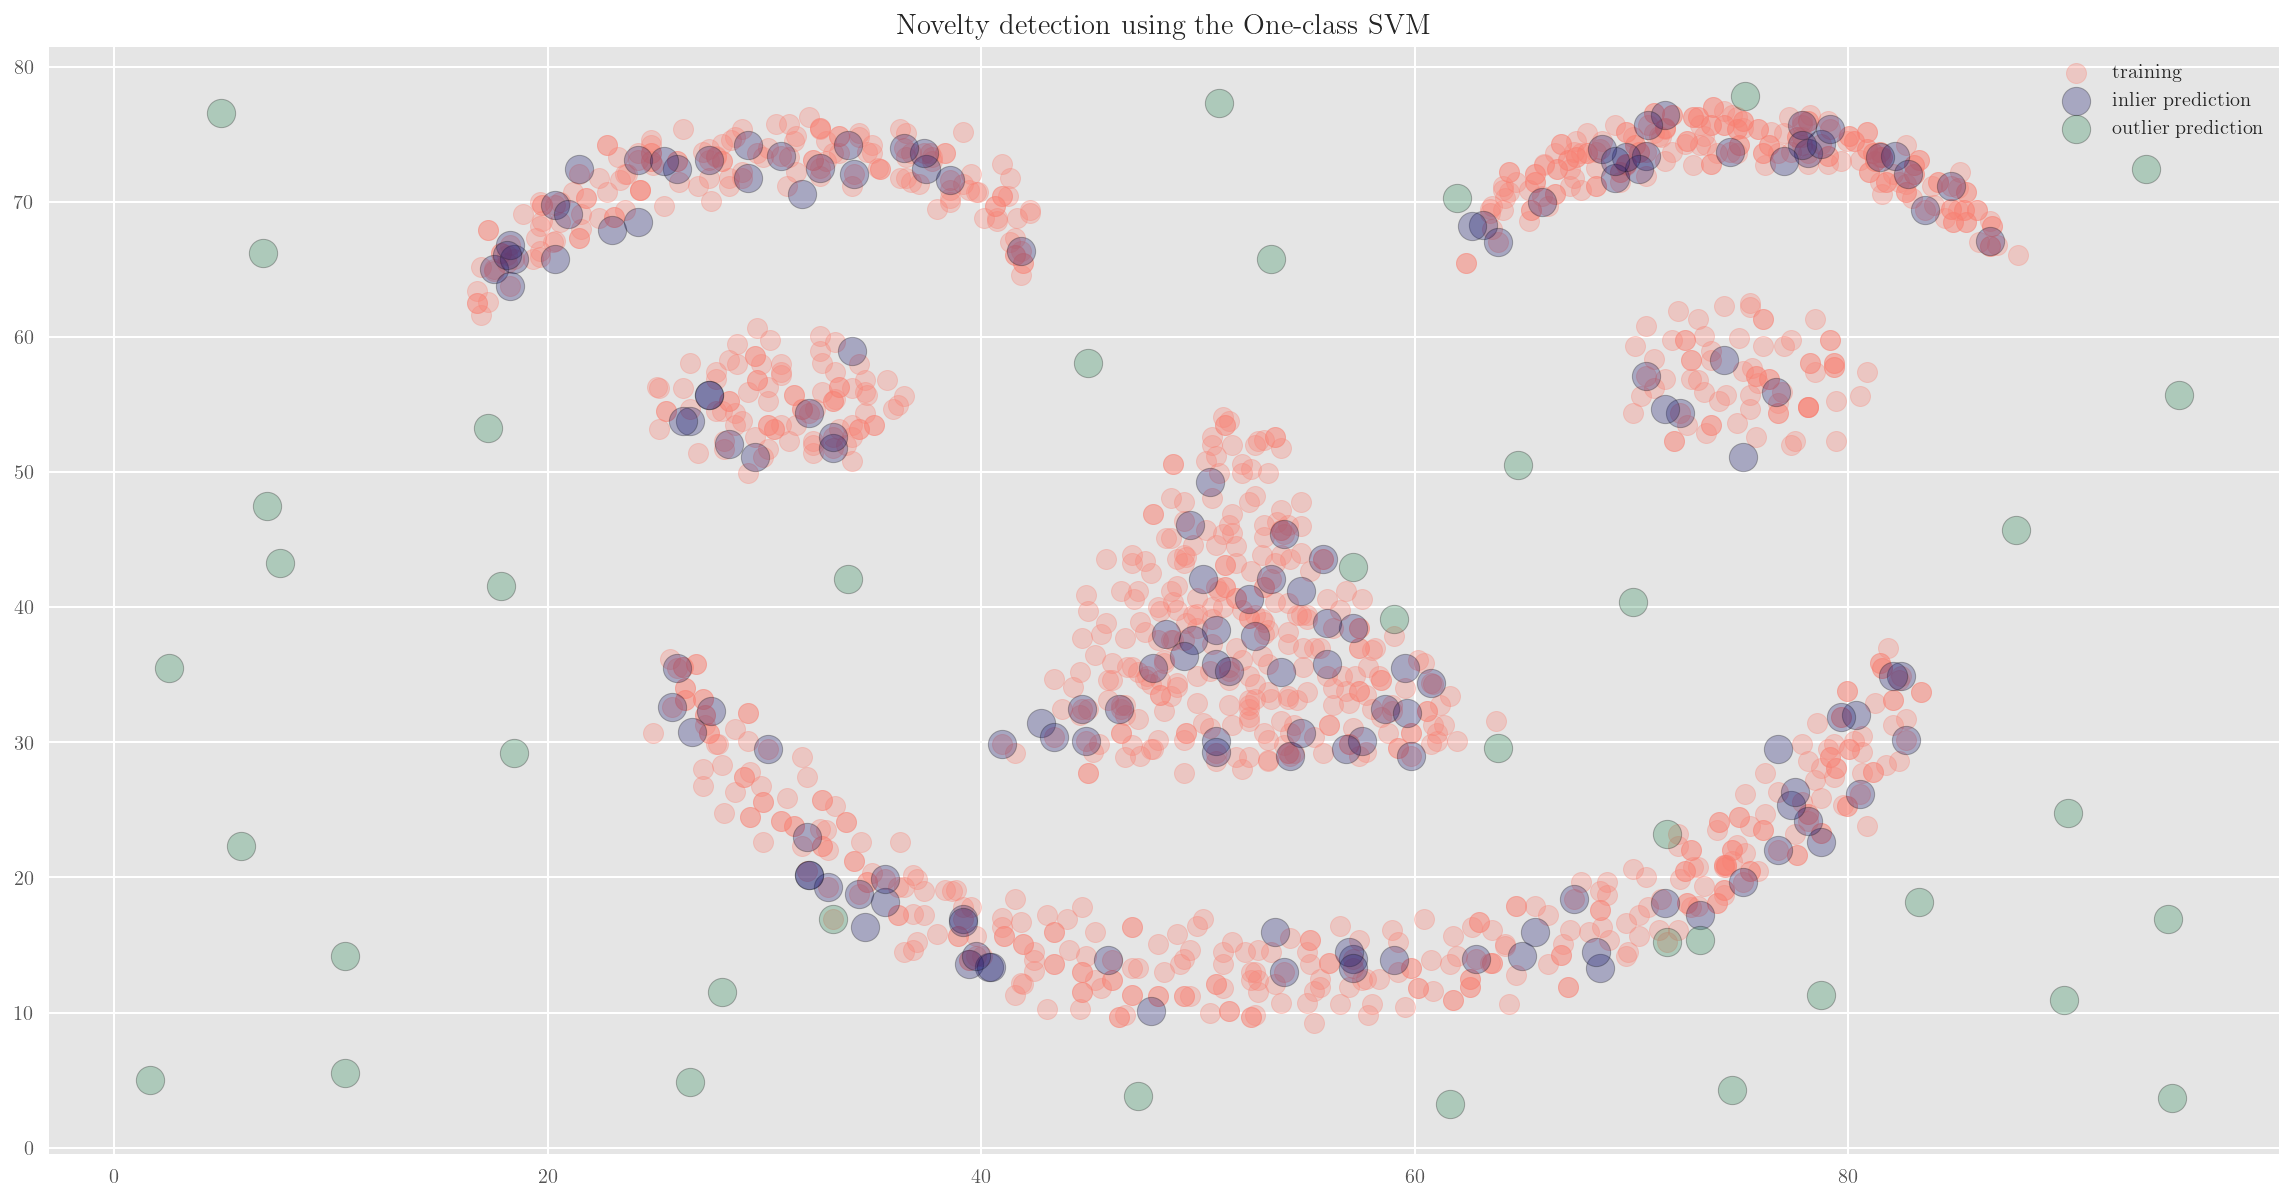

In [9]:
plt.scatter(inlier_train.x, inlier_train.y, s=100, color='salmon', alpha=0.3, label='training');

pred_inlier = test_data[test_data.pred == 1]
pred_outlier = test_data[test_data.pred == -1]

plt.scatter(pred_inlier.x, 
            pred_inlier.y, 
            s=200, 
            edgecolor='k', 
            alpha=0.3,  
            c='midnightblue', 
            label='inlier prediction')

plt.scatter(pred_outlier.x, 
            pred_outlier.y, 
            s=200, 
            edgecolor='k', 
            alpha=0.3,  
            c='seagreen', 
            label='outlier prediction')
plt.legend()
plt.title('Novelty detection using the One-class SVM')

Since we happen to know the ground-truth, let us compare it with the novelty-detector's inference to see how well it worked.

In [10]:
test_data['actual'] = np.where(test_data.t > 0, 1, -1)

cm = confusion_matrix(test_data.actual, test_data.pred)
print(cm)

[[ 32   0]
 [  9 153]]


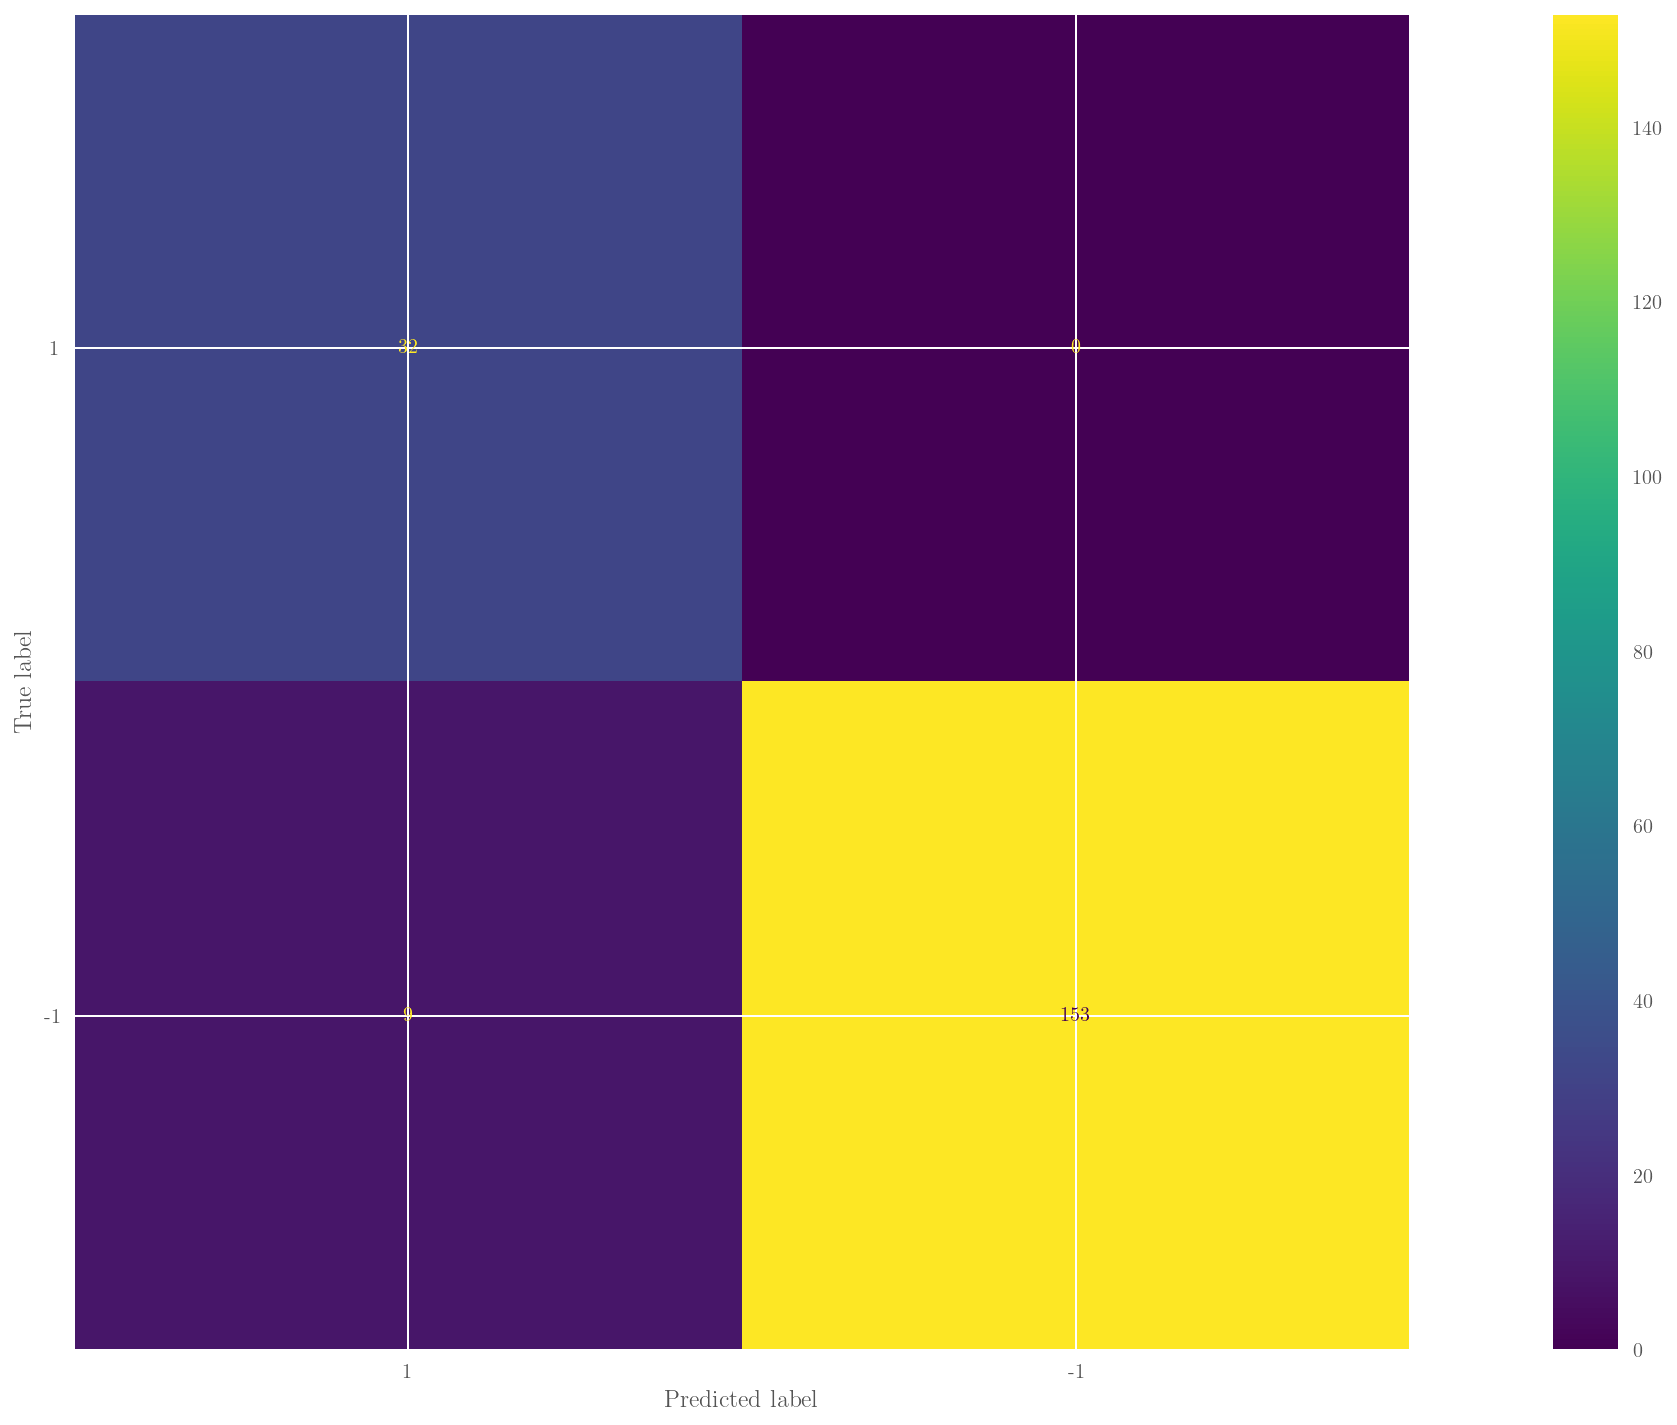

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1, -1])
disp.plot()
plt.tight_layout()

## Homework

The `OneClassSVM` is rather sensitive to the choice of hyperparameters. Change both `nu` and `gamma` in the constructor, and see how it affects the effectiveness of this detector.